# 15.6 Case Study: Unsupervised Machine Learning, Part 1—Dimensionality Reduction 
* We’ve focused on **getting to know your data**
* **Unsupervised machine learning** and **visualization** can help you **find patterns and relationships among unlabeled samples**
* Visualizing data with **two variables** is easy
    * Plot data in **2D** with **one variable along each axis**
    * Visualization libraries also can plot datasets with **three variables in 3D** 
* But how do you visualize data with **more than three dimensions**?
    * **Digits dataset** samples each have **64 features (dimensions) and a target value** 
    * **Big data** samples can have **hundreds**, **thousands** or even **millions of features (dimensions)**

# 15.6 Case Study: Unsupervised Machine Learning, Part 1—Dimensionality Reduction (cont.)
* To **visualize**, must **reduce** the data to **two** or **three dimensions**
* Use an **unsupervised machine learning** technique called **dimensionality reduction** 
* Visualizing the results can **reveal patterns in the data** that will help you **choose the most appropriate machine learning algorithms** to use
* For example, **Clusters** of points might indicate **distinct classes** of information within the dataset
	* So a **classification algorithm** might be appropriate
	* Still need to **determine the class** of the samples in each cluster
	* Might require **consulting with a domain expert** and **studying samples in a cluster** to see **what they have in common** 

# 15.6 Case Study: Unsupervised Machine Learning, Part 1—Dimensionality Reduction (cont.)
* **Dimensionality reduction** also serves other purposes
    * **Training estimators on big data** with **significant numbers of dimensions** can take **hours, days, weeks or longer**. 
    * **Difficult for humans to think about highly dimensional data**
    * Could eliminate or combine **closely correlated features** to **improve training performance** 
        * Might **reduce the accuracy** of the model

### Loading the Digits Dataset
* **Ignore Digits dataset labels** and use **dimensionality reduction** to help visualize the data in two dimensions
* **We added `%matplotlib inline` to enable Matplotlib in this notebook.**

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

### Creating a `TSNE` Estimator for Dimensionality Reduction 
* `TSNE` estimator uses an algorithm called **t-distributed Stochastic Neighbor Embedding (t-SNE)** to analyze a dataset’s features and reduce them to the specified number of dimensions 
	* [Algorithm’s details](https://scikit-learn.org/stable/modules/manifold.html#t-sne) are **beyond scope**
	* We first tried the popular **`PCA`** (principal components analysis) estimator but did not like the results, so we switched to **`TSNE`**
* Create a `TSNE` object that **reduces a dataset’s features to two dimensions** 
* `random_state` for **reproducibility of the “render sequence”** when we display the digit clusters

In [3]:
from sklearn.manifold import TSNE

In [4]:
tsne = TSNE(n_components=2, random_state=11)

### Transforming the Digits Dataset’s Features into Two Dimensions
* **Lecture note: Takes about 15-20 seconds, so run code first**
* Two steps
	* **Train the estimator** with the dataset
	* **Use the estimator** to **transform** the data into the **specified number of dimensions**
* Can **perform separately** with `TSNE` methods **`fit`** and **`transform`**
* Perform in **one statement** using **`fit_transform`**
    * Returns array with **same number of rows** as `digits.data` and **two columns** 

In [5]:
reduced_data = tsne.fit_transform(digits.data)

In [6]:
reduced_data.shape

(1797, 2)

### Visualizing the Reduced Data
* Rather than Seaborn’s `scatterplot` function, use Matplotlib’s **`scatter` function**
    * Returns collection of plotted items, which we’ll use in a second scatter plot

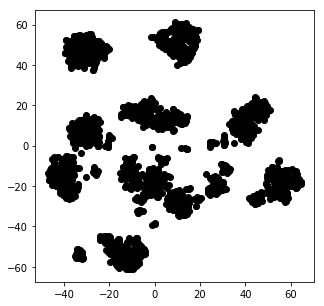

In [7]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(5, 5))
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='black')

<!-- ![Black and white Digits dataset clustering scatterplot after TSNE dimensionality reduction to two dimensions](./ch14images/digits_black.png "Black and white Digits dataset clustering scatterplot after TSNE dimensionality reduction to two dimensions") -->

### Visualizing the Reduced Data (cont.)
* **Did not label axes** &mdash; they **do not correspond to specific features** of the original dataset
* **New features** produced by **`TSNE`** could be quite different from **dataset’s original features**
* Clear **clusters** of related data points
* Appear to be **11 main clusters, rather than 10** 
* Some **"loose" data points**  
    * Makes sense because, as you saw, **some digits were difficult to classify**

### Visualizing the Reduced Data with Different Colors for Each Digit
* **Don’t know** whether all the **items in each cluster** represent the **same digit** 
    * If not, then the clusters are not helpful 
* Use **`target`s** in **Digits dataset** to **color the dots** to see whether clusters indeed represent specific digits
* **`c=digits.target`** &mdash; use `target` values determine dot colors
* **`cmap=plt.cm.get_cmap('nipy_spectral_r', 10)`** &mdash; **color map** to use 
    * Specifically use **10 distinct colors** for the 10 digits 
* Last statement adds color bar key 

In [ ]:
figure = plt.figure(figsize=(6, 5))

dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
    c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
 
colorbar = plt.colorbar(dots)  

------
&copy;1992&ndash;2020 by Pearson Education, Inc. All Rights Reserved. This content is based on Chapter 5 of the book [**Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud**](https://amzn.to/2VvdnxE).

DISCLAIMER: The authors and publisher of this book have used their 
best efforts in preparing the book. These efforts include the 
development, research, and testing of the theories and programs 
to determine their effectiveness. The authors and publisher make 
no warranty of any kind, expressed or implied, with regard to these 
programs or to the documentation contained in these books. The authors 
and publisher shall not be liable in any event for incidental or 
consequential damages in connection with, or arising out of, the 
furnishing, performance, or use of these programs.                  